APPLE STOCK ANALYSIS
>OBJECTIVE<

Analyze historical Apple stock data to uncover trends, patterns, and insights, 
and practice foundational data analytics and visualization skills.


In [33]:
import pandas as pd

apple_stocks = pd.read_csv("apple_stocks.csv")
print(apple_stocks.info())
print(apple_stocks.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    129 non-null    object 
 1   Open    129 non-null    float64
 2   High    129 non-null    float64
 3   Low     129 non-null    float64
 4   Close   129 non-null    float64
 5   Volume  129 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 6.2+ KB
None
        Date    Open    High     Low   Close    Volume
0   7-Jul-17  142.90  144.75  142.90  144.18  19201712
1   6-Jul-17  143.02  143.50  142.41  142.73  24128782
2   5-Jul-17  143.69  144.79  142.72  144.09  21569557
3   3-Jul-17  144.88  145.30  143.10  143.50  14277848
4  30-Jun-17  144.45  144.96  143.78  144.02  23024107


Data Overview.

Key columns include:

Date : The date of each observation.

Open,High,Low,Close : Stock prices.

Volume : The trading volume.

Step 2: Lets check for missing values in the data.

apple_stocks.isnull().sum()

The above code will sum up the total no. of null values present in the dat

In [34]:
print(apple_stocks.isnull().sum())

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


As we see there is no null values in the data.

Missing value will be hadled as part of the cleaning process

As there is no missing data so we'll learn it to handle when we come  across it in other data

Step 3: Lets check and handle duplicate data.


In [35]:
print("Duplicates:", apple_stocks.duplicated().sum())

Duplicates: 0


Since there is no duplicate data.

Lets move forward with Step 4:

Analyze Stock Trends

1.Convert Date to Datetime

In [53]:
apple_stocks["Date"]= pd.to_datetime(apple_stocks["Date"], format = "%d-%b-%y")

So we got the error  TypeError:

so lets troubleshoot it

So i've trobleshooted it the problem with this code

 "apple_stocks["Date"]= pd.to_datetime(apple_stocks["Date"])" 
 
 is that its showing type error because it was an object data type so ive converted it by typing.
 
 "apple_stocks["Date"]= pd.to_datetime(apple_stocks["Date"], format = "%d-%b-%y", errors="coerce"" )

Here Explanation:
1. format="%d-%b-%y": it will covert it into python datetime format according to your need here ive specified the format.
2. errors="coerce" = you'll use this if there were invalid entries in the data.

There are many ways to solve this isssue

if your date data is not in string then convert it into string

apple_stocks=apple_stocks["Date"].astype(str)

now it can convert in date time format

apple_stocks = pd.is_datetime(apple_stocks["Date"], format="%d-%b-%y")

So, why we have converted the date into datetime format because it'll help us in for time-series analysis.

Step 4: Calculate insights

Lets calculate the highest and lowest closing price:

max_close = apple_stocks.loc[apple_stock["Close"].idxmax()]

min_close = apple_stocks.loc[apple_stock["Close"].idxmin()]

In [30]:
max_close=apple_stocks.loc[apple_stocks["Close"].idxmax()]
min_close=apple_stocks.loc[apple_stocks["Close"].idxmin()]
print(max_close,min_close)

Date      2017-05-12 00:00:00
Open                    154.7
High                   156.42
Low                    154.67
Close                   156.1
Volume               32527017
Name: 38, dtype: object Date      2017-01-04 00:00:00
Open                   115.85
High                   116.51
Low                    115.75
Close                  116.02
Volume               21118116
Name: 127, dtype: object


Key insights:

Highest closing price : 156.1 on 2017-05-12

Lowest closing price : 116.02 on 2017-01-04

Step 5: Visualize Trends

5.1 : Line Plot for Closing Prices



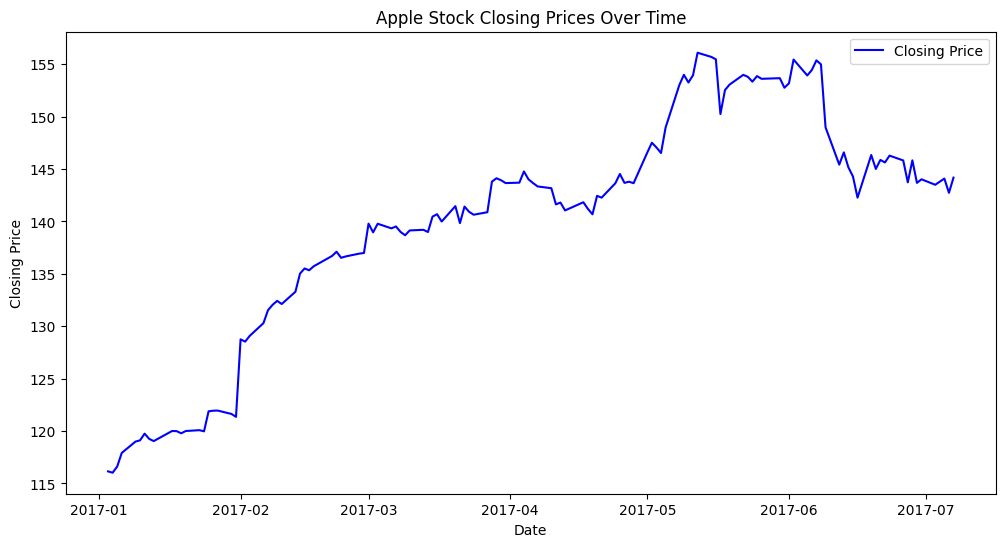

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(apple_stocks['Date'], apple_stocks['Close'], label='Closing Price', color='blue')
plt.title('Apple Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

Visualization : Closing Prices Over Time

- The line plot shows how Apple’s stock prices have fluctuated historically.

5.2: Rolling Average



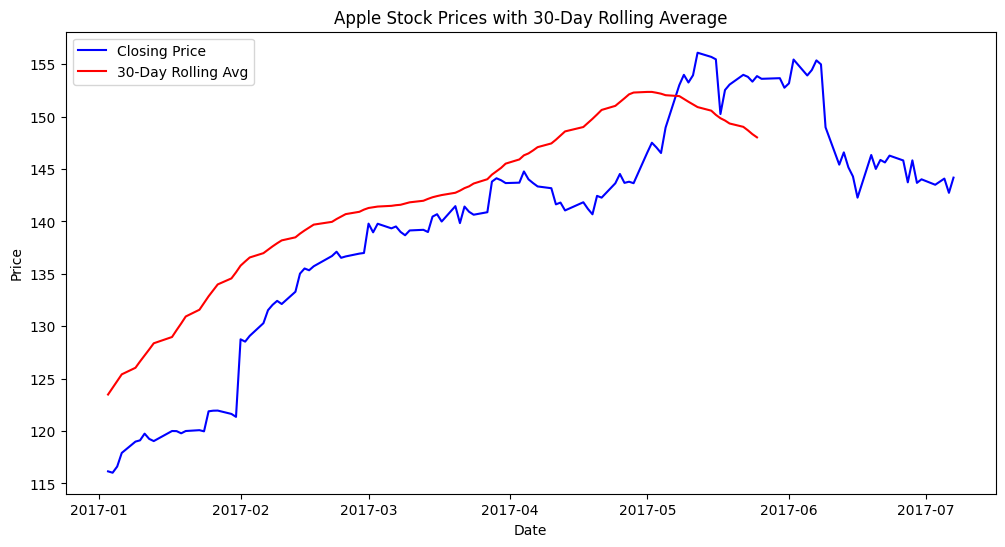

In [55]:
# Calculate 30-day rolling average
apple_stocks['30_Day_Rolling_Avg'] = apple_stocks['Close'].rolling(window=30).mean()

# Plot with rolling average
plt.figure(figsize=(12, 6))
plt.plot(apple_stocks['Date'], apple_stocks['Close'], label='Closing Price', color='blue')
plt.plot(apple_stocks['Date'], apple_stocks['30_Day_Rolling_Avg'], label='30-Day Rolling Avg', color='red')
plt.title('Apple Stock Prices with 30-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Visualization : Rolling Average (30 days)

- The 30-day rolling average smooths short-term fluctuations and highlights long-term trends.

In [48]:
apple_stocks.to_csv('../apple_stock_analysis/cleaned_apple_stock_analysis.csv', index=False)

In [49]:
start_date = apple_stocks["Date"].min()
end_date = apple_stocks["Date"].max()

print(start_date,end_date)

1-Feb-17 9-May-17


Conclusion

- This analysis demonstrates significant growth in Apple’s stock prices during 1-Feb-17 till 9-May-17.

- The rolling average highlights consistent upward trends.

- Key insights include:
  - Highest Closing Price: $156.1 on 2017-05-12.
  - Lowest Closing Price: $116.02 on 2017-01-04.